# EDA 
## Примеры использования функций для сборки данных 
### Импорт

In [1]:
import sys
sys.path.append("..")
from datetime import date
from src.data.fetch_usd        import get_usd_rub as USDRUBFetcher
from src.data.fetch_euro       import get_eur_rub as EURRUBFetcher
from src.data.fetch_euro       import cli as euro_cli 
from src.data.fetch_cny        import get_cny_rub as CNYRUBFetcher
from src.data.fetch_ruonia     import get_ruonia as  RUONIAFetcher
from src.data.fetch_moex       import get_moex_index as MOEXIndexFetcher
from src.data.fetch_ofz_yield  import get_combined_zcyc_data as OFZYieldFetcher
from src.data.merged_data     import DataMerger

### Курсы валют (на примере USD/RUB)

In [2]:
usd_df = USDRUBFetcher(date(2025,1,1), date.today())
usd_df.head()

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,DATE,usd_rub
0,2025-05-17,80.7689
1,2025-05-16,80.3134
2,2025-05-15,80.2237
3,2025-05-14,80.5500
4,2025-05-13,80.8883


### Сохранить курс на примере евро

In [3]:
euro_cli(date(2025,1,1), date.today())

Saved 88 rows to /Users/dmlast/Documents/Projects/ruonia-forecast/data/raw/eur_rub_(datetime.date(2025, 1, 1), datetime.date(2025, 5, 17)).csv.gz


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Получить и посмотреть кривую бескупонной доходности


In [4]:
zcyc = OFZYieldFetcher(date(2025,1,1), date.today())
zcyc.head()

2025-05-17 23:35:04,733 - zcyc_fetcher_combined - INFO - Запрос комбинированных данных ZCYC с 2025-01-01 по 2025-05-17
2025-05-17 23:35:04,734 - zcyc_fetcher_combined - INFO - Загрузка исторических данных из /Users/dmlast/Documents/Projects/ruonia-forecast/data/raw/zcyc_hist.csv
2025-05-17 23:35:04,746 - zcyc_fetcher_combined - INFO - Успешно загружено 1079 записей из CSV.
2025-05-17 23:35:04,748 - zcyc_fetcher_combined - INFO - Загружено 13 строк из CSV (отфильтровано до 2025-05-05).
2025-05-17 23:35:04,749 - zcyc_fetcher_combined - INFO - Диапазон для запроса к API: с 2025-05-06 по 2025-05-17
2025-05-17 23:35:04,749 - zcyc_fetcher_combined - INFO - Загрузка данных ZCYC с API по дням с 2025-05-06 по 2025-05-17
2025-05-17 23:35:12,567 - zcyc_fetcher_combined - INFO - Всего получено 96 записей из API.
2025-05-17 23:35:12,578 - zcyc_fetcher_combined - INFO - Получено 8 строк (дат) из API.
2025-05-17 23:35:12,580 - zcyc_fetcher_combined - INFO - Всего в финальном датафрейме: 21 уникальных

,0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0,DATE,15.0,20.0,30.0
20,20.3799,19.3166,18.5619,18.0210,16.9292,16.4728,16.0760,15.9040,15.7912,2025-05-16,15.7017,15.6652,15.6473
19,20.7147,19.5580,18.7462,18.1689,17.0142,16.5412,16.1332,15.9541,15.8307,2025-05-15,15.7394,15.7058,15.6899
18,20.7614,19.6012,18.7719,18.1691,16.9205,16.4176,16.0208,15.8635,15.7432,2025-05-14,15.6179,15.5521,15.5093
17,20.5286,19.3498,18.5570,18.0188,17.0211,16.5941,16.1891,15.9895,15.8416,2025-05-13,15.7484,15.7238,15.7196
16,20.5387,19.4195,18.6282,18.0627,16.9241,16.4443,16.0232,15.8373,15.7118,2025-05-12,15.6171,15.5827,15.5707


### Cобрать всё в одну таблицу и сохранить


In [5]:
merged = DataMerger(date(2025,5,1), date(2025,5,15))
merged.save_as_pqt()

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
2025-05-17 23:35:15,044 - moex_fetcher - INFO - Выполняется запрос с позиции 0
2025-05-17 23:35:15,995 -

PosixPath('/Users/dmlast/Documents/Projects/ruonia-forecast/data/raw/merged_20250501_20250515.parquet')

## Предварительный анализ данных 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

from src.data.fetch_ruonia    import get_ruonia
from src.data.fetch_usd       import get_usd_rub
from src.data.fetch_euro       import get_eur_rub
from src.data.fetch_cny       import get_cny_rub
from src.data.fetch_moex      import get_moex_index
from src.data.fetch_ofz_yield import get_combined_zcyc_data

In [9]:
df_ruo  = get_ruonia(start_date=date(2015,1,1), end_date=date.today()).reset_index()
df_usd  = get_usd_rub(start_date=date(2015,1,1), end_date=date.today())
df_eur  = get_eur_rub(start_date=date(2015,1,1), end_date=date.today())
df_cny  = get_cny_rub(start_date=date(2015,1,1), end_date=date.today())
df_idx  = get_moex_index(start_date=date(2015,1,1), end_date=date.today())
df_ofz  = get_combined_zcyc_data(start_date=date(2015,1,1), end_date=date.today())

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
2025-05-17 23:36:32,948 - moex_fetcher - INFO - Выполняется запрос с позиции 0
2025-05-17 23:36:33,933 -

## Плотности

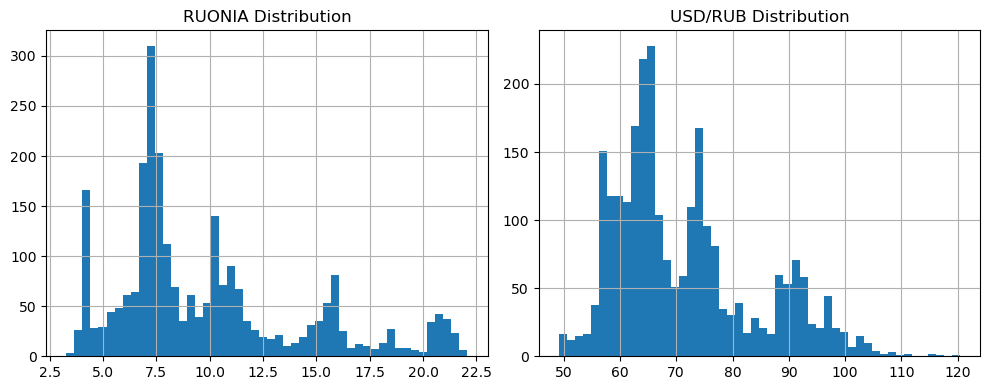

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df_ruo['ruonia'].hist(bins=50, ax=axes[0])
axes[0].set_title("RUONIA Distribution")
df_usd['usd_rub'].hist(bins=50, ax=axes[1])
axes[1].set_title("USD/RUB Distribution")
plt.tight_layout()
plt.show()

## Временные ряды (последние 365 дней)


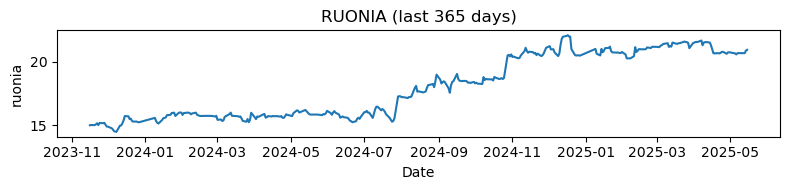

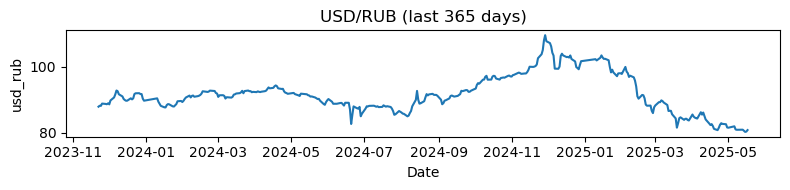

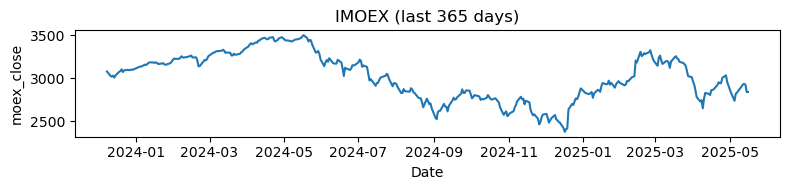

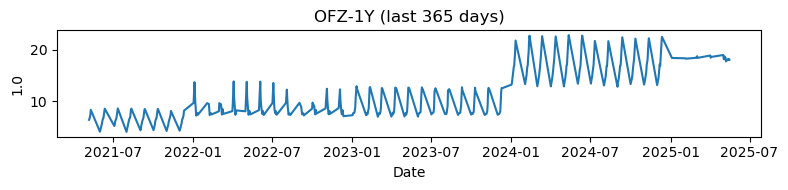

In [12]:
df_idx = df_idx.sort_values('DATE', ascending = False)
for name, df, col in [
    ("RUONIA", df_ruo, 'ruonia'),
    ("USD/RUB", df_usd.reset_index(), 'usd_rub'),
    ("IMOEX", df_idx.reset_index(), 'moex_close'),
    ("OFZ-1Y", df_ofz, '1.0'),
]:
    sub = df.head(365)
    plt.figure(figsize=(8, 2))
    plt.plot(pd.to_datetime(sub['DATE']), sub[col])
    plt.title(f"{name} (last 365 days)")
    plt.ylabel(col)
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

## Корреляции ключевых series (pooled)


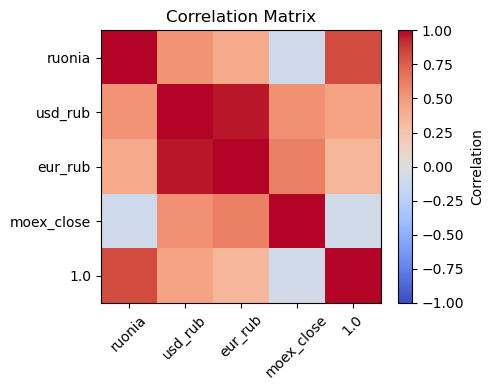

In [13]:
common = pd.concat([
    df_ruo.set_index('DATE')['ruonia'],
    df_usd.set_index('DATE')['usd_rub'],
    df_eur.set_index('DATE')['eur_rub'],
    df_idx.set_index('DATE')['moex_close'],
    df_ofz.set_index('DATE')['1.0'],
], axis=1)
corr = common.corr()
plt.figure(figsize=(5, 4))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()